In [1]:
import requests

r = requests.get("http://httpbin.org/ip")



In [2]:
r.json()


{'origin': '163.221.132.88'}

In [3]:
r = requests.post("http://httpbin.org/post", data={"name": "leo"})

In [4]:
r.json()

{'args': {},
 'data': '',
 'files': {},
 'form': {'name': 'leo'},
 'headers': {'Accept': '*/*',
  'Accept-Encoding': 'gzip, deflate',
  'Content-Length': '8',
  'Content-Type': 'application/x-www-form-urlencoded',
  'Host': 'httpbin.org',
  'User-Agent': 'python-requests/2.32.3',
  'X-Amzn-Trace-Id': 'Root=1-669f9646-5e2bdf1e0ccda950553ff97c'},
 'json': None,
 'origin': '163.221.132.88',
 'url': 'http://httpbin.org/post'}

In [2]:
import requests

r = requests.get("http://httpbin.org/ip")
r.json()

{'origin': '163.221.132.88'}

In [3]:
r = requests.post("http://httpbin.org/post", data={"name": "leo"})
r.json()

{'args': {},
 'data': '',
 'files': {},
 'form': {'name': 'leo'},
 'headers': {'Accept': '*/*',
  'Accept-Encoding': 'gzip, deflate',
  'Content-Length': '8',
  'Content-Type': 'application/x-www-form-urlencoded',
  'Host': 'httpbin.org',
  'User-Agent': 'python-requests/2.32.3',
  'X-Amzn-Trace-Id': 'Root=1-66a0c29a-651f6a477fd0587827978528'},
 'json': None,
 'origin': '163.221.132.88',
 'url': 'http://httpbin.org/post'}

In [5]:
                                                                                                                                                        d = {"key1": "value1", "key2": "value2"}
r = requests.get("http://httpbin.org/get", params=d)
print(r.url)

http://httpbin.org/get?key1=value1&key2=value2


In [7]:
r = requests.get('http://httpbin.org/ip')
print(r.text)

{
  "origin": "163.221.132.88"
}



In [11]:
r = requests.get('http://httpbin.org/ip')
d = r.json()
print(d)
print(d['origin'])

{'origin': '163.221.132.88'}
163.221.132.88


In [12]:
r = requests.get('http://httpbin.org/get')
r.status_code


200

In [13]:
r.raise_for_status()

In [16]:
r = requests.get('http://httpbin.org/headers')
print(r.json())
r.headers

{'headers': {'Accept': '*/*', 'Accept-Encoding': 'gzip, deflate', 'Host': 'httpbin.org', 'User-Agent': 'python-requests/2.32.3', 'X-Amzn-Trace-Id': 'Root=1-66a0c847-4fc0dc066171bb5a105bfa0c'}}


{'Date': 'Wed, 24 Jul 2024 09:24:23 GMT', 'Content-Type': 'application/json', 'Content-Length': '225', 'Connection': 'keep-alive', 'Server': 'gunicorn/19.9.0', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Credentials': 'true'}

In [17]:
url = 'http://httpbin.org/headers'
headers = {'user-agent': 'my-app/0.0.1'}
r = requests.get(url, headers=headers)
r.text

'{\n  "headers": {\n    "Accept": "*/*", \n    "Accept-Encoding": "gzip, deflate", \n    "Host": "httpbin.org", \n    "User-Agent": "my-app/0.0.1", \n    "X-Amzn-Trace-Id": "Root=1-66a0c868-18ba4fdc655fb2966bc68c62"\n  }\n}\n'

In [18]:
url = 'http://httpbin.org/post'
d = {'key1': 'value1', 'key2': 'value2'}
r = requests.post(url, data=d)
r.text

'{\n  "args": {}, \n  "data": "", \n  "files": {}, \n  "form": {\n    "key1": "value1", \n    "key2": "value2"\n  }, \n  "headers": {\n    "Accept": "*/*", \n    "Accept-Encoding": "gzip, deflate", \n    "Content-Length": "23", \n    "Content-Type": "application/x-www-form-urlencoded", \n    "Host": "httpbin.org", \n    "User-Agent": "python-requests/2.32.3", \n    "X-Amzn-Trace-Id": "Root=1-66a0c8bc-7280e78405aee5ae6c15305f"\n  }, \n  "json": null, \n  "origin": "163.221.132.88", \n  "url": "http://httpbin.org/post"\n}\n'

In [1]:
import qrcode

img = qrcode.make('https://www.google.com')

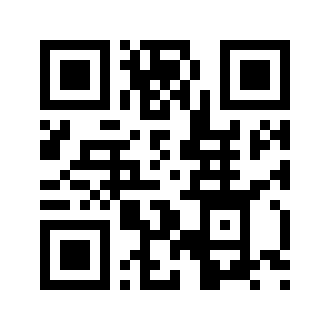

In [2]:
img

In [85]:
import os
import json
import pandas as pd
from csv import writer
from openai import OpenAI
from scipy import spatial
from tenacity import retry, wait_random_exponential, stop_after_attempt
from tqdm import tqdm


In [86]:
GPT_MODEL = "gpt-4o"
client = OpenAI()

# Function to generate ChatCompletion response
@retry(wait=wait_random_exponential(min=1, max=40), stop=stop_after_attempt(3))
def chat_completion_request(messages, functions=None, model=GPT_MODEL):
    try:
        response = client.chat.completions.create(
            model=model,
            messages=messages,
            tools=tools,
            tool_choice="required",
        )
        return response
    except Exception as e:
        print("Unable to generate ChatCompletion response")
        print(f"Exception: {e}")
        return e


In [87]:
rse = [
    {
        "type": "function",
        "function": {
            "name": "get_weather",
            "strict": True,
            "parameters": {
                "type": "object",
                "properties": {
                    "location": {"type": "string"},
                    "unit": {"type": "string", "enum": ["c", "f"]},
                },
                "required": ["location", "unit"],
                "additionalProperties": False,
            },
        },
    },
    {
        "type": "function",
        "function": {
            "name": "get_stock_price",
            "strict": True,
            "parameters": {
                "type": "object",
                "properties": {
                    "symbol": {"type": "string"},
                },
                "required": ["symbol"],
                # "additionalProperties": False,
            },
        },
    },
]


tools = [
    {
        "type": "function",
        "function": {
            "name": "gen_emr",
            "strict": True, 
            "parameters": {
                "type": "object",
                "properties": {
                    # "diagnosis": {"type": "string"},
                    # "medical_history": {"type": "string"},
                    "symptoms": {"type": "string"},
                },
                "required": ["symptoms"],
                "additionalProperties": False,
            },
        },
    },
]

func=[
    {
        "name": "generate_emr",
        "description": "会話に基づいて電子病歴を生成します",
        "parameters": {
            "type": "object",
            "properties": {
                "diagnosis": {"type": "string", "description": "診断結果"},
                "medical_history": {"type": "string", "description": "病歴"},
                "symptoms": {"type": "string", "description": "症状"},
            },
            "required": ["diagnosis"],
        }
    }
]

In [88]:
class Conversation:
    def __init__(self):
        self.conversation_history = []

    def add_message(self, role, content):
        message = {"role": role, "content": content}
        self.conversation_history.append(message)

In [89]:
content = """
1
00:00:00,000 --> 00:00:04,000
では次のシーンです

2
00:00:04,240 --> 00:00:08,359
下村さんの鎖骨の細胞から

3
00:00:08,800 --> 00:00:12,439
がん細胞が認められました

4
00:00:12,439 --> 00:00:29,079
でも手術できるんですよね

5
00:00:29,079 --> 00:00:36,719
治療のことなど今後のことが気になりますよね

6
00:00:36,719 --> 00:00:44,920
治療のことを説明する前に下村さんの病状について

7
00:00:44,920 --> 00:00:50,039
もう少し説明させてもらってもいいですか

8
00:00:50,039 --> 00:00:52,799
今回はがんを伝えること

9
00:00:52,799 --> 00:00:55,239
そしてそのがんが治らないこと

10
00:00:55,239 --> 00:00:58,519
その2つを伝えるというケースでした

11
00:00:58,519 --> 00:01:03,960
その非常に大きな意味を持つがんであること

12
00:01:03,960 --> 00:01:08,640
治らないことの後には患者さんの感情が揺さぶられます

13
00:01:08,640 --> 00:01:11,960
その感情に対してやはり共感を示すためには

14
00:01:11,960 --> 00:01:13,960
十分に時間をとって

15
00:01:13,960 --> 00:01:15,879
具体的には沈黙ですけど

16
00:01:15,879 --> 00:01:18,760
10秒ぐらい取ることが非常に重要です

17
00:01:18,760 --> 00:01:21,960
その沈黙をとることによって

18
00:01:21,960 --> 00:01:23,599
感情が出せた後

19
00:01:23,599 --> 00:01:27,640
また患者さんは次の情報を少し聞くことができます

20
00:01:27,640 --> 00:01:31,359
そして今回はがんの別の側面

21
00:01:31,359 --> 00:01:34,599
具体的には日常生活に与える影響について

22
00:01:34,599 --> 00:01:37,280
説明が続けられました

23
00:01:37,280 --> 00:01:39,239
その説明をした後も

24
00:01:39,239 --> 00:01:44,359
やはり感情について配慮するために沈黙を使って

25
00:01:44,359 --> 00:01:46,920
そしてその具体的な確認には

26
00:01:46,920 --> 00:01:50,039
理解がいかがですか

27
00:01:50,039 --> 00:01:51,799
話が早くないですかと

28
00:01:51,799 --> 00:01:53,760
そういった言葉を挟みました

29
00:01:53,760 --> 00:01:57,319
そういった言葉を挟みながら

30
00:01:57,319 --> 00:02:00,400
情報を伝えて感情に配慮して

31
00:02:00,400 --> 00:02:03,280
そして次に進むかどうかを確認する

32
00:02:03,280 --> 00:02:06,960
その繰り返しを何度も行ったわけですけど

33
00:02:06,960 --> 00:02:09,599
最後にまとめを行って

34
00:02:09,599 --> 00:02:15,680
コミュニケーションを閉じるということになったかと思います

35
00:02:15,680 --> 00:02:19,360
以上手術不可能な進行期肺がんの告知について

36
00:02:19,360 --> 00:02:21,759
シェアを使ったケースをご覧いただきました


"""
"""
2
00:00:03,600 --> 00:00:08,140
SPEAKER_00|うつ病の診断は、普通に症状がどれぐらいあるかだよね

3
00:00:08,140 --> 00:00:12,439
SPEAKER_00|落ち込んでるとか、調子が悪いとか、寝れてないとか、食べれてないとか

4
00:00:12,439 --> 00:00:14,339
SPEAKER_00|そういうことやる気が出てないとか

5
00:00:14,339 --> 00:00:18,379
SPEAKER_01|患者さんが来てそれを言ったら、じゃああなたうつ病ですって診断するんですか?

6
00:00:18,580 --> 00:00:21,300
SPEAKER_00|まあそうだよね、うつ症状だよね

7
00:00:21,300 --> 00:00:25,400
SPEAKER_00|それであとは時系列を聞いたりとか、いつ頃からなったのかで

8
00:00:25,400 --> 00:00:30,900
SPEAKER_00|うつ病なのか、PTSDなのか、発達障害、認知障害としてうつ状態なのか

9
00:00:30,900 --> 00:00:35,679
SPEAKER_00|一過性のストレスなのか、適応障害なのか、まあいろいろ判断したりするけどね

10
00:00:35,679 --> 00:00:36,020
SPEAKER_00|ありがとうございます
"""

'\n2\n00:00:03,600 --> 00:00:08,140\nSPEAKER_00|うつ病の診断は、普通に症状がどれぐらいあるかだよね\n\n3\n00:00:08,140 --> 00:00:12,439\nSPEAKER_00|落ち込んでるとか、調子が悪いとか、寝れてないとか、食べれてないとか\n\n4\n00:00:12,439 --> 00:00:14,339\nSPEAKER_00|そういうことやる気が出てないとか\n\n5\n00:00:14,339 --> 00:00:18,379\nSPEAKER_01|患者さんが来てそれを言ったら、じゃああなたうつ病ですって診断するんですか?\n\n6\n00:00:18,580 --> 00:00:21,300\nSPEAKER_00|まあそうだよね、うつ症状だよね\n\n7\n00:00:21,300 --> 00:00:25,400\nSPEAKER_00|それであとは時系列を聞いたりとか、いつ頃からなったのかで\n\n8\n00:00:25,400 --> 00:00:30,900\nSPEAKER_00|うつ病なのか、PTSDなのか、発達障害、認知障害としてうつ状態なのか\n\n9\n00:00:30,900 --> 00:00:35,679\nSPEAKER_00|一過性のストレスなのか、適応障害なのか、まあいろいろ判断したりするけどね\n\n10\n00:00:35,679 --> 00:00:36,020\nSPEAKER_00|ありがとうございます\n'

In [90]:
system_message = "あなたは医療アシスタントです。会話からカルテを抽出してください"
conversation = Conversation()
conversation.add_message("system", system_message)

In [91]:
conversation.add_message("user", "以下の会話からカルテを抽出してください" + content)
chat_response = chat_completion_request(messages=conversation.conversation_history)

print(chat_response)

ChatCompletion(id='chatcmpl-AC7EbfbBso4Ai9EWHk7OShMCPIpPj', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content=None, refusal=None, role='assistant', function_call=None, tool_calls=[ChatCompletionMessageToolCall(id='call_ly219aOxD2hZ4L1s1zOlKw33', function=Function(arguments='{"symptoms":"がん細胞が鎖骨に見つかる。手術不可能な進行期肺がん。"}', name='gen_emr'), type='function')]))], created=1727451109, model='gpt-4o-2024-05-13', object='chat.completion', service_tier=None, system_fingerprint='fp_c17d3befe7', usage=CompletionUsage(completion_tokens=39, prompt_tokens=1190, total_tokens=1229, completion_tokens_details={'reasoning_tokens': 0}))


In [6]:
import qrcode

img = qrcode.make('https://www.google.com', box_size=1, border=2)
img 